# Gradient plots (examples)

## Temperature

In [1]:
import xgcm
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
%matplotlib inline

In [29]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

In [30]:
# temperature at k01 ensemble member #1 (preprocessed)
directory = '~/chazbpei2020/data/processed/Temp/'
filename = 'temp_k01_ensAvg_1950_2100.nc'
temp_path = directory+filename
ds = xr.open_dataset(temp_path)

In [31]:
# Convert time objects to type DateTime64 (optional)
# ds_copy = ds
# time_new = ds.indexes['time'].to_datetimeindex()
# ds = ds.assign_coords({'time': time_new})
# ds

## Infer cell boundaries using xgcm.autogenerate

In [32]:
# generate_grid_ds infers the missing cell positions

# default behavior is to extrapolite grid position to the left
ds_full = xgcm.generate_grid_ds(ds, {'X':'xt_ocean', 'Y':'yt_ocean'})

In [33]:
# Create grid object (periodic along X-axis)
grid = xgcm.Grid(ds_full, periodic=['X'], 
                 coords={'X': {'center': 'xt_ocean', 'left': 'xt_ocean_left'},
                         'Y': {'center': 'yt_ocean', 'left': 'yt_ocean_left'}})
grid

<xgcm.Grid>
X Axis (periodic):
  * center   xt_ocean --> left
  * left     xt_ocean_left --> center
Y Axis (not periodic):
  * center   yt_ocean --> left
  * left     yt_ocean_left --> center

In [34]:
# Compute difference (in degrees) along longitude and latitude for
# both cell center and left

dlong = grid.diff(ds_full.xt_ocean, 'X', boundary_discontinuity=360)
dlonc = grid.diff(ds_full.xt_ocean_left, 'X', boundary_discontinuity=360)

dlatg = grid.diff(ds_full.yt_ocean, 'Y', boundary='fill', fill_value=np.nan)
dlatc = grid.diff(ds_full.yt_ocean_left, 'Y', boundary='fill', fill_value=np.nan)

In [35]:
# Convert degrees to actual Cartesian distances on the Earth
# add distances to coordinates in data
ds_full.coords['dxg'], ds_full.coords['dyg'] = dll_dist(dlong, dlatg, ds_full.xt_ocean, ds_full.yt_ocean)
ds_full.coords['dxc'], ds_full.coords['dyc'] = dll_dist(dlonc, dlatc, ds_full.xt_ocean, ds_full.yt_ocean)
dyg = ds_full.dyg.fillna(111000)
dyc = ds_full.dyc.fillna(111000)
ds_full.coords['dyg'] = dyg
ds_full.coords['dyc'] = dyc

In [36]:
# Calculate area of each gridcell
ds_full.coords['area_c'] = ds_full.dxc * ds_full.dyc

In [37]:
# Compute zonal (along x-axis) gradient of surface temperature
dtemp_dx = grid.diff(ds_full['temp'], 'X') / (ds_full['dxg'] / 1000)
# Temperature gradient is located in the depth-left dimension
dtemp_dx

<xarray.DataArray (time: 1812, st_ocean: 1, yt_ocean: 180, xt_ocean_left: 360)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.00848051e-04,  9.45450474e-05,  8.19390410e-05, ...,
           1.89090095e-05,  1.26060063e-05,  8.82420442e-05],
         [ 1.36537335e-04,  1.05028720e-04,  9.45258476e-05, ...,
           1.47040207e-04,  1.57543079e-04,  1.36537335e-04],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       [[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.07151054e-04,  9.45450474e-05,  8.82420442e-05, ...,
           1.89090095e-05,  1.26060063e-05,  9.45450474e-05],
         [ 1.36537335e-04,  1.26034463e-04,  9.45258476e-05, ...,
           1.68045951e-04,  1.68045951e-04,  1.47040207e-04],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       [[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.13454057e-04,  1.00848051e-04,  8.82420442e-05, ...,
           2.52120126e-05,  1.26060063e-05,  9.45450474e-05],
         [ 1.47040207e-04,  1.26034463e-04,  1.05028720e-04, ...,
           1.78548823e-04,  1.78548823e-04,  1.68045951e-04],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       ...,


       [[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 9.39147470e-04,  8.50905426e-04,  7.24845363e-04, ...,
           7.56360379e-05,  5.04240253e-05,  7.94178398e-04],
         [ 7.03692421e-04,  6.19669445e-04,  4.83132110e-04, ...,
           8.40229756e-04,  8.50732628e-04,  7.77212525e-04],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       [[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-6.93330347e-05, -6.30300316e-05, -5.67270284e-05, ...,
          -1.26060063e-05,  0.00000000e+00, -6.30300316e-05],
         [-7.35201037e-05, -7.35201037e-05, -5.25143598e-05, ...,
          -9.45258476e-05, -9.45258476e-05, -9.45258476e-05],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00

## Spatial Gradient of k01 Temperature (ºK / km)

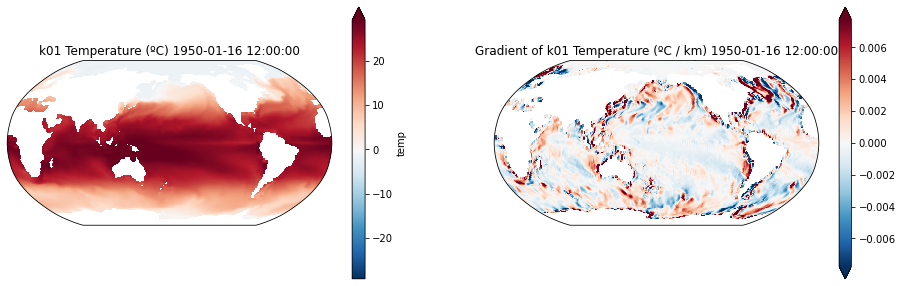

In [38]:
crs = ccrs.Robinson(central_longitude=180)
# crs = ccrs.Orthographic()
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=[16,5],
                               subplot_kw={'projection':crs})

for ti,tt in enumerate(np.arange(0, 1)):

#     More options: 
#     ax1 = axs[ti,0]  # axes on the left
#     ax2 = axs[ti,1]  # axes on the right

#     clevs = np.arange(275, 310, 5)
#     colors = ['purple','blue','green','yellow','orange','red','pink']

    time = ds_full.time.isel(time=tt).data
    # plot temperature
    # transform = ccrs.PlateCarree() used as defualt
    (ds_full.temp.isel(time=tt) - 273.15).plot(ax=axs[0], transform=ccrs.PlateCarree(), robust=True)
    # plot zonal (x-axis) gradient
    dtemp_dx.isel(time=tt).plot(ax=axs[1], transform=ccrs.PlateCarree(), robust=True)
    
    axs[0].set_title('k01 Temperature (ºC) %s' %time)
    axs[1].set_title('Gradient of k01 Temperature (ºC / km) %s' %time)

    for ax in axs:
        ax.set_global()  # set extent of the axes to limits of of the projection

fig.savefig("ex_gradient_plots")

## Effects of filtering outliers with 'robust' keyword

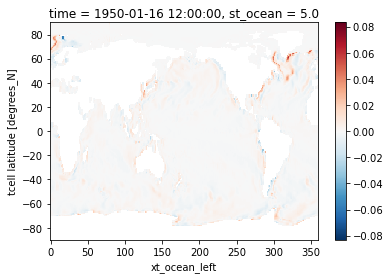

In [39]:
dtemp_dx[0,0].plot()

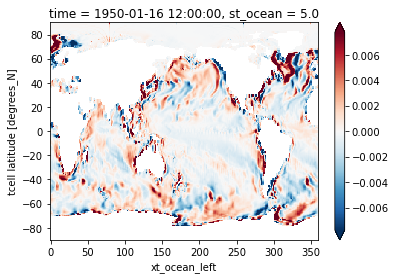

In [40]:
# Robust keyword uses 2nd-98th percentile of data
dtemp_dx[0,0].plot(robust=True)

## k01 Temperature Change (ºC / decade)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


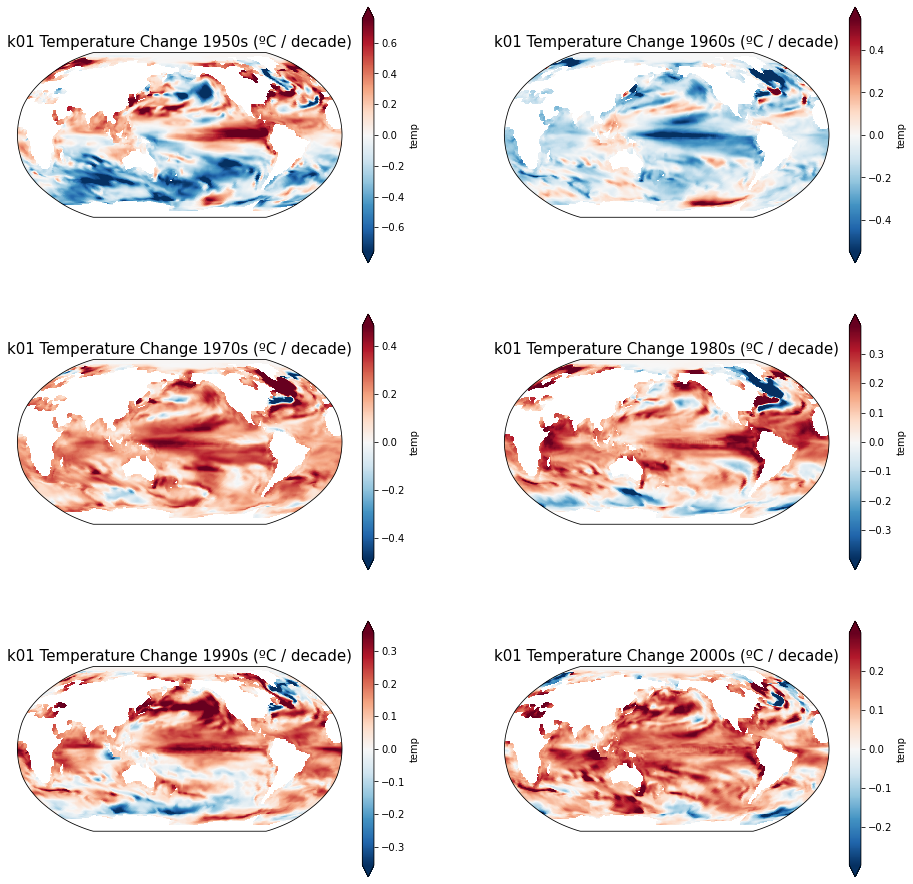

In [41]:
crs = ccrs.Robinson(central_longitude=180)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=[16,16],
                               subplot_kw={'projection':crs})

ds_annual = ds_full.groupby('time.year').mean(dim='time')

time0 = 1950
time1 = 1960

# Plot k01 Temp change for first 6 decades
for row in range(0, 3):
    for col in range(0, 2):

        # calculate dtemp/dt for each decade
        dtemp_dt = (ds_annual.temp.sel(year=time1) - ds_annual.temp.sel(year=time0))
        dtemp_dt.plot(ax=axs[row, col], transform=ccrs.PlateCarree(), robust=True)

        axs[row,col].set_title('k01 Temperature Change %ss (ºC / decade)' %time0,
                              fontsize=15)

        axs[row,col].set_global()  # set extent of the axes to limits of of the projection
#         ax.coastlines() # set coastlines
        time0 += 10
        time1 += 10
        
        
fig.savefig("ex_gradient_plots")

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


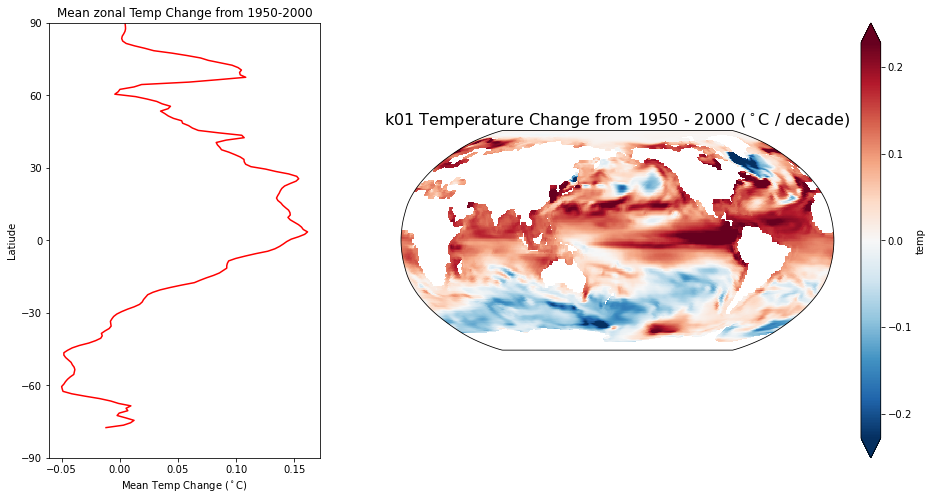

In [42]:
# Plot mean zonal temp change // map of zonal temp change

# specify projection
crs = ccrs.Robinson(central_longitude=180)

# Manually add different subplots (for two different axes types)
fig = plt.figure(figsize=[16,8])
gs = fig.add_gridspec(1, 2, width_ratios=[1,2]) # add gridspec object
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], projection=crs)

# Calculate temp change for first 5 decades (using bookending annual means)
time0 = 1950
time1 = 2000
ds_annual = ds_full.groupby('time.year').mean(dim='time')
dtemp_dt = (ds_annual.temp.sel(year=time1) - ds_annual.temp.sel(year=time0))/5

# plot median zonal k01 temperature at each latitude
X = dtemp_dt.mean(dim='xt_ocean').squeeze()
Y = dtemp_dt['yt_ocean']
ax0.plot(X, Y, 'r')
ax0.set_title('Mean zonal Temp Change from 1950-2000',loc='center')
ax0.set_ylim(-90,90)
ax0.set_yticks(np.arange(-90,91,30))
ax0.set_xlabel('Mean Temp Change ($^\circ$C)')
ax0.set_ylabel('Latiude')

# Plot k01 decadal Temp change for first 5 decades
dtemp_dt.plot(ax=ax1, transform=ccrs.PlateCarree(), robust=True)

ax1.set_title('k01 Temperature Change from 1950 - 2000 ($^\circ$C / decade)',
             fontsize=16)

fig.savefig("ex_gradient_plots")

Text(0.5, 1.0, 'k01 Temperature Change from 1950 - 2000 ($^\\circ$C / decade)')

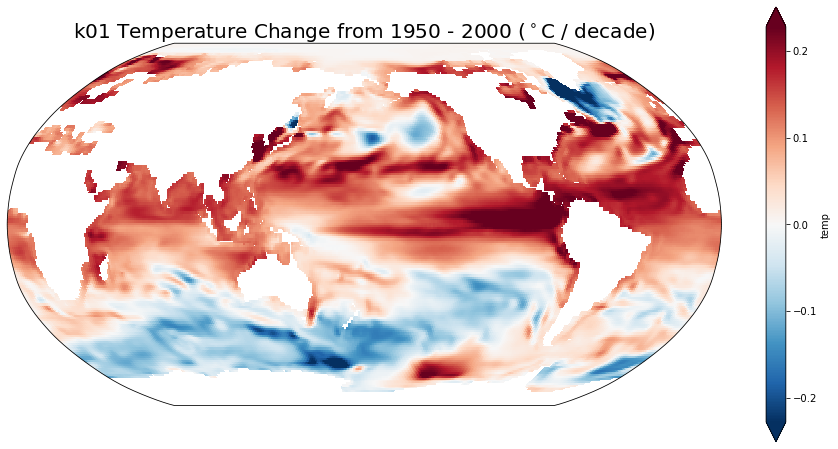

In [43]:
# Plot k01 decadal Temp change for first 5 decades
crs = ccrs.Robinson(central_longitude=180)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=[16,8], 
                        subplot_kw={'projection':crs})

time0 = 1950
time1 = 2000
dtemp_dt = (ds_annual.temp.sel(year=time1) - ds_annual.temp.sel(year=time0))/5

dtemp_dt.plot(ax=axs, transform=ccrs.PlateCarree(), robust=True)

axs.set_title('k01 Temperature Change from 1950 - 2000 ($^\circ$C / decade)', 
              fontsize=20)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/matplotlib/colors.py:1442: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= b] = i
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/matplotlib/colors.py:1446: RuntimeWarning: invalid value encountered in less
  iret[xx < self.vmin] = -1
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/matplotlib/colors.py:1447: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= self.vmax] = max_col


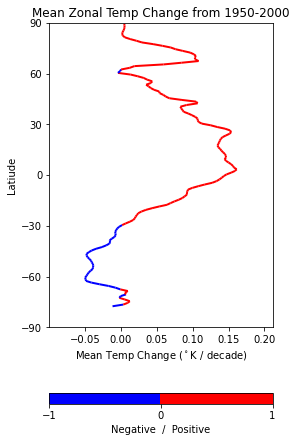

In [44]:
# plot latitudinal mean zonal k01 temperature change at each latitude
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4,8])
X = dtemp_dt.mean(dim='xt_ocean', skipna=True).squeeze()
Y = dtemp_dt['yt_ocean']


# Create a set of line segments so that we can color them individually
# Create points as a N x 1 x 2 array so they can be stacked together
# easily to get the segments. 
# The segments array for line collection needs to be (numlines) x 
# (points per line) x 2 (for x and y)
points = np.array([X,Y]).T.reshape(-1, 1, 2)  # parameter -1 tells python to find correct dim
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Use a boundary norm to distinguish warming from cooling
cmap = mpl.colors.ListedColormap(['b', 'r'])
norm = mpl.colors.BoundaryNorm([-1, 0, 1], cmap.N)
lc = mpl.collections.LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(X)
lc.set_linewidth(2)
line = ax.add_collection(lc)
cbar = fig.colorbar(line, ax=ax, orientation='horizontal')
cbar.set_label('Negative  /  Positive')


ax.set_title('Mean Zonal Temp Change from 1950-2000',loc='center')
# ax.autoscale(enable=True, axis='y', tight=True) # Make x-axis "tight"
ax.set_ylim(-90,90)
ax.set_xlim(X.min()-0.05, X.max()+0.05)
ax.set_yticks(np.arange(-90,91,30))
ax.set_xlabel('Mean Temp Change ($^\circ$K / decade)')
ax.set_ylabel('Latiude')

plt.show()

fig.savefig("ex_gradient_plots")

## Plot Temperature Velocity (km/decade)

<ipython-input-152-50eda500bea5>:12: RuntimeWarning: divide by zero encountered in true_divide
  ds_vel = dt / dx


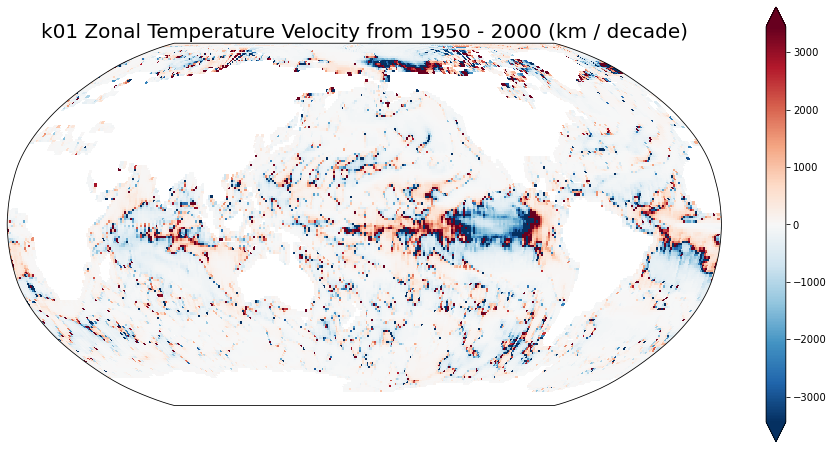

In [152]:
crs = ccrs.Robinson(central_longitude=180)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=[16,8],
                               subplot_kw={'projection':crs})

dt = dtemp_dt.data.squeeze()
dx = dtemp_dx.isel(time=300).data.squeeze()  # zonal gradient in Jan 1975

# print(np.shape(dt))
# print(np.shape(dx))
# print(np.shape(ds_velocity))

ds_vel = dt / dx

# print(np.shape(ds_vel))
X = dtemp_dt.xt_ocean
Y = dtemp_dt.yt_ocean

ds_velocity = xr.DataArray(ds_vel, coords=[Y, X], dims=['yt_ocean', 'xt_ocean'])

ds_velocity = ds_velocity.where(ds_velocity.loc[:,:] != np.inf)


ds_velocity.plot(ax=axs, transform=ccrs.PlateCarree(), robust=True)
axs.set_title('k01 Zonal Temperature Velocity from 1950 - 2000 (km / decade)',
             fontsize=20)

fig.savefig("ex_gradient_plots")

## Testing arrow plotting with axes.quiver()

In [3]:
def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


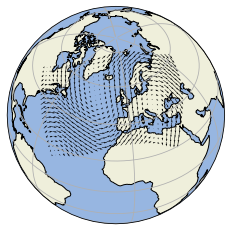

In [4]:
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

x, y, u, v, vector_crs = sample_data()
ax.quiver(x, y, u, v, transform=vector_crs)

plt.show()